# Importing the required libraries

In [1]:
# Library required for structured Python code

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Library required to suppress any warning messages
import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [3]:
# Libraries required to

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform Hierarchical clustering, compute cophenetic correlation and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

## Load dataset

In [4]:
# reading the excel dataset

cc_data = pd.read_excel(
    "Credit Card Customer Data.xlsx", index_col=0
)  # set the first column as index

<IPython.core.display.Javascript object>

In [5]:
# creating a copy of the dataset

data = cc_data.copy()

<IPython.core.display.Javascript object>

# Data Structure Analysis

In [6]:
# viewing 10 random observations of the dataset

data.sample(n=10, random_state=1)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
548,38125,26000,4,5,2,4
354,94437,9000,5,4,1,3
500,65825,68000,6,4,2,2
174,38410,9000,2,1,5,8
242,81878,10000,4,5,1,3
342,70779,18000,4,3,2,0
648,79953,183000,9,0,9,2
219,28208,19000,3,1,5,7
121,16577,10000,4,2,4,6


<IPython.core.display.Javascript object>

- From the first look of the data, it seems pretty neat
- Sl_No is set as the index column
- Customer Key seems to be all unique
- No null values in Avg_Credit_Limit, Total_Credit_Cards and Total_visits online
- There are '0's in Total_visits_bank. This could be because the customer prefers netbanking comparatively.
- Again, there are '0's in the Total_calls_made. 
- Need to check if the '0's are missing values or data entry error

In [7]:
# Checking the shape of the dataset

data.shape

(660, 6)

<IPython.core.display.Javascript object>

- There are 660 rows and 6 columns in all

In [8]:
# Checking the overall information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


<IPython.core.display.Javascript object>

- No missing values listed
- All six columns are of data type integer
- memory used id 36.1 KB

In [9]:
# Checking for null values

data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

- No null values present

In [10]:
# Checking the statistical summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


<IPython.core.display.Javascript object>

- 660 observations present in all
- The minimum and maximum values indicate Avg_Credit_Limit is highly skewed 
- The average number of credit cards held by customers is 4, while the minimum is 1 and maximum is 10 cards
- The average number of in-person visits to the bank is 2, while the minimum is 0 and maximum is 5
- The average online visits is 3, while the minimum is 0 and maximum is 15
- The average number of calls made is 4, while the minum is 0 and maximum is 10

In [11]:
# Checking the number of unique values in each column
data.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# Printing the unique values in each column

cols = data.columns
for i in cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Customer Key are :
50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64


----------------------------------------

Unique values in Avg_Credit_Limit are :
8000      35
6000      31
13000     28
9000      28
10000     26
19000     26
11000     24
7000      24
18000     23
17000     23
14000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
50000      8
38000      8
56000      7
39000      7
68000      7
41000      6
48000      6
47000      6
34000      6
30000      6
52000      6
37000      6
74000      6
26000      5
65000      5
60000      5
29000      5
31000      5
73000      4
49000      4
59000      4
54000      4
71000      4
51000      4
66000      4
69000      4
64000      4
33000      4
40000      3
61000      3
44000      3
62000      3
28000      3
45000      3
57000      3
72000      3
67000     

<IPython.core.display.Javascript object>

- As seen above, there are 5 duplicate values in Customer Key
- Maximum of 35 customer have a Avg_Credit_Limit of 8K dollars
- 151 customers hold 4 credit cards followed by 117 customers with 6 credit cards and 101 customers with 7 credit cards
- Maximum number of credit cards owned by a customer is 10
- Maximum of 158 customers make atleast 2 visits to the bank (yearly), whereas maximum number of bank visits made by a customer (yearly) is 5
- Maximum of 189 customers make atleast 2 visits online (yearly), whereas number of online visits made by a customer (yearly) is 15
- Maximum of 108 customers make atleast 4 calls to the bank (yearly), whereas maximum number of calls made by a customer (yearly) is 10

# Exploratory Data Analysis

## Univariate Analysis

In [13]:
# Defining a method to plot histogram and boxplot combined in a single plot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    feature : dataframe column
    figsize : size of figure (default (12,7))
    kde : whether to show the density curve (default False)
    bins : number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## 1. Average Credit Limit

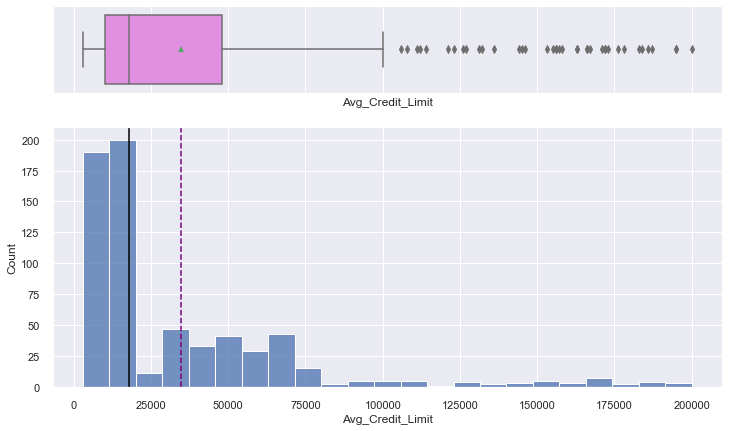

<IPython.core.display.Javascript object>

In [14]:
# adds background to the graph
sns.set(color_codes=True)

histogram_boxplot(data, "Avg_Credit_Limit")

- Avg_Credit_Limit indicates a right-skewed distribution
- Majority of the customers have credit limit under 25K which indicates majority of the customers use the basic credit cards with lower credit limit
- Outliers above the upper whisker indicate there are customers holding Premium credit cards with higher credit limits ranging between 100K and 200K

In [15]:
# checking the extreme values

data[data["Avg_Credit_Limit"] > 100000]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
613,94391,157000,9,1,14,1
615,40019,163000,8,1,7,1
616,77910,131000,9,1,10,1
618,98216,136000,8,0,13,0
619,54495,121000,7,0,13,2
620,47650,158000,7,0,13,0
621,32107,108000,10,0,15,1
622,84192,166000,9,1,12,2
623,53916,176000,10,1,15,2


<IPython.core.display.Javascript object>

- It is evident from the above observation that the extreme values in Avg_Credit_Limit are for customers holding 7 credit cards or more
- It is also seen that these are the customers who make highest number of online visits

## 2. Total number of Credit Cards

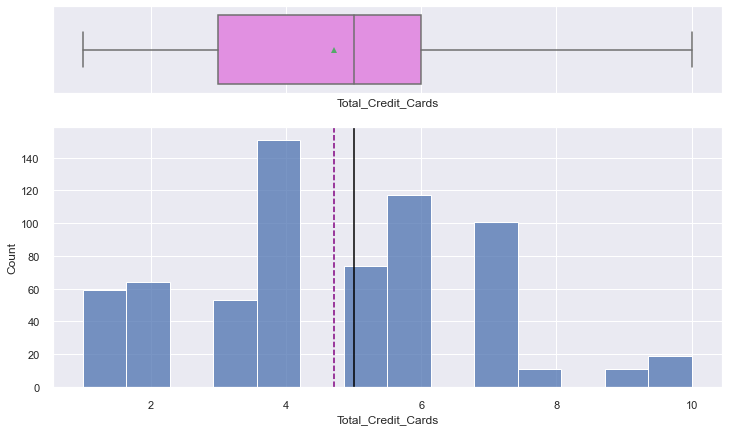

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Total_Credit_Cards")

- The minimum number of credit cards owned by a customer is 1 whereas, the maximum number of credit cards owned is 10
- Large number of customers hold 4 credit cards followed by 6 and 7
- Customers own around 4 or 5 credit cards on an average

## 3. Total number of bank visits 

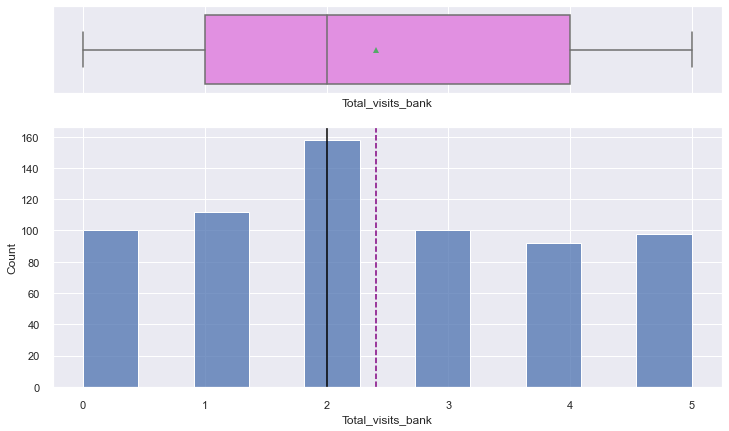

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Total_visits_bank")

- Large number of customers visit the bank atleast twice, yearly
- Maximum number of bank visits made by a customer is 5 
- There are almost equal number of customers who never visit the bank in-person in comparison to the number of customer who pay maximum number of visits to the bank

In [18]:
# checking the maximum value

data[data["Total_visits_bank"] == 5]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
231,46635,17000,4,5,0,2
235,15129,16000,6,5,0,4
237,56486,8000,7,5,2,3
242,81878,10000,4,5,1,3
247,69965,7000,4,5,0,1
249,44398,11000,6,5,1,0
250,32352,9000,6,5,2,0
253,33457,9000,4,5,0,4
256,27408,7000,5,5,2,3


<IPython.core.display.Javascript object>

- Customers who own around 4-7 credit cards make maximum visit to the bank
- Second highest preferred mode of contact by these customers is via calls

## 4. Total number of online visits

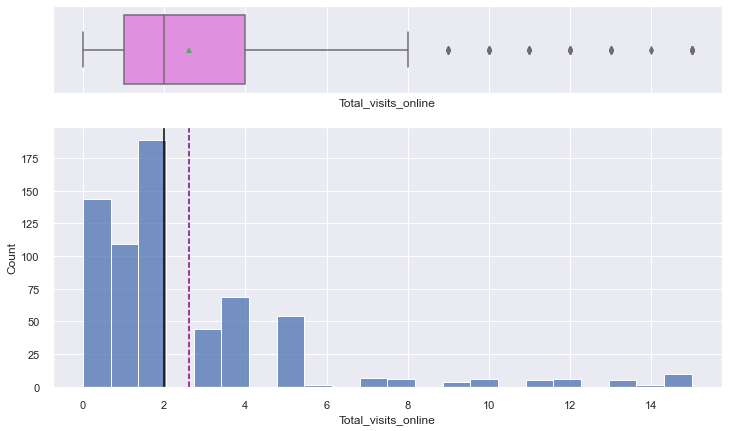

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Total_visits_online")

- Total_visits_online indicates a right-skewed distribution
- Majority of the customers avail online banking only 2 or less number of times
- Outliers above the upped whisker indicates there are customers who make use of the online services to the maximum. As seen in from the above data analysis, these might be the customers who do not visit the bank in-person nor make calls 

In [20]:
# checking for extreme values

data[data["Total_visits_online"] > 8]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
2,38414,50000,3,0,10,9
5,47437,100000,6,0,12,3
7,48370,100000,5,0,11,2
613,94391,157000,9,1,14,1
614,50598,94000,9,1,11,0
616,77910,131000,9,1,10,1
617,89832,96000,10,1,11,2
618,98216,136000,8,0,13,0
619,54495,121000,7,0,13,2


<IPython.core.display.Javascript object>

- As seen above, customers with 7 or more number of credit cards make 9 or more number of online visits
- Also, they are the customers who make little to no bank visits or calls

## 5. Total number of calls made

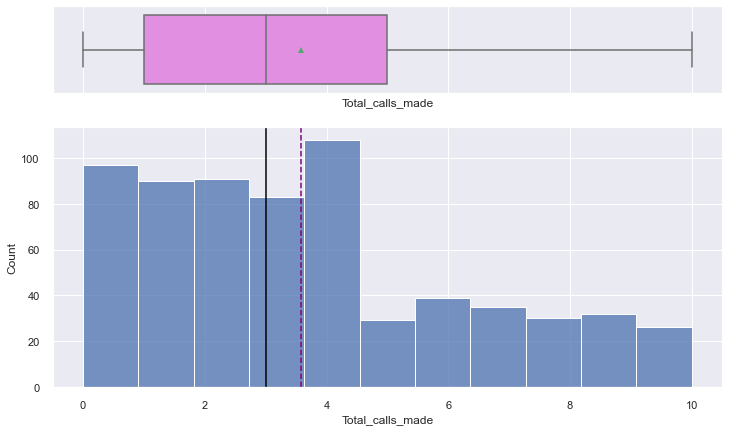

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Total_calls_made")

- The average number of calls made to the bank / customer service department is close to 4
- Maximum number of calls made by a customer is 10
- Maximum number of customers either make 4 calls yearly, or no calls at all
- The customers who never make a call may be the one's who prefer to visit the bank or avail the online services available

In [22]:
# checking the maximum value

data[data["Total_calls_made"] == 10]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
25,24001,8000,2,0,2,10
26,68067,18000,1,1,5,10
28,14854,9000,2,2,2,10
33,82164,6000,1,0,5,10
35,28254,8000,4,1,3,10
37,46388,9000,3,1,4,10
39,52142,13000,4,1,3,10
58,17937,6000,2,0,2,10
69,66524,7000,1,2,4,10


<IPython.core.display.Javascript object>

- Customers who own around 1-4 credit cards make maximum calls to the bank
- Second highest preferred mode of contact by these customers is via online visits

## Bivariate Analysis

In [23]:
# Making a list of numerical columns excluding 'Customer Key', for further analysis
num_cols = data.columns.drop("Customer Key")
num_cols

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<IPython.core.display.Javascript object>

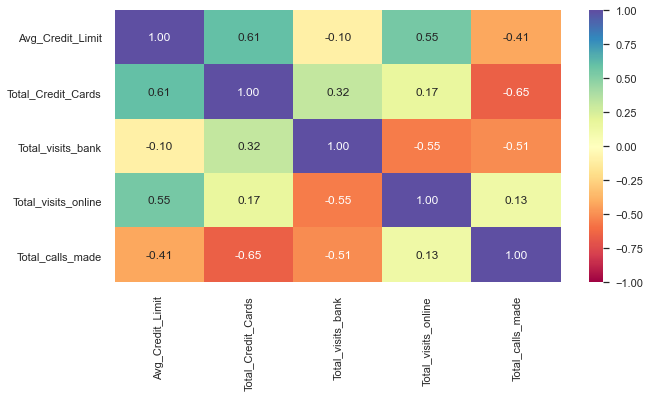

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Avg_Credit_Limit is positively correlated to Total_Credit_Cards and Total_visits_online
- Avg_Credit_Limit is negatively correlated to Total_calls_made and Total_visits_bank
- Total_Credit_Cards is also positive correlated to Total_visit_bank and Total_visits_online and is in a high negative correlation with Total_calls_made
- Total_visits_bank is in a negative correlation with Total_visits_online, Total_calls_made and Avg_Credit_Limit. It is in moderate positive correlation to Total_Credit_Cards

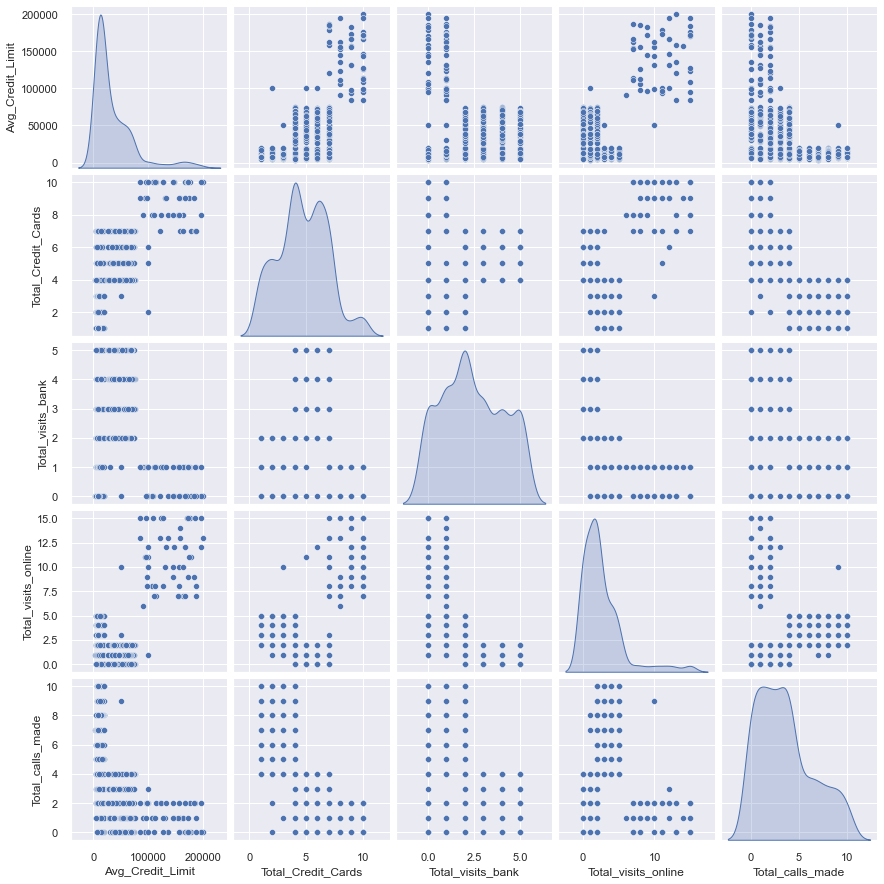

<IPython.core.display.Javascript object>

In [25]:
sns.pairplot(data=data[num_cols], diag_kind="kde")
plt.show()

- Avg_Credit_Limit is higher for customers with 6 or more number of credit cards and they prefer online visits comparatively
- Customer holding more number of credit cards do more number of online visits
- In general, customers holding an average of 4 to 7 credit cards make maximum bank visits
- Customers who make 5 or above calls to the bank are the one's whose Avg_Credit_Limit is below 30K
- Data distribution suggests the number of clusters to be 3 or 4

# Key Insights from EDA

- Large number of customer have an average credit limit below \\$25K. This implies a majority of customers own Standard credit cards i.e., cards with low credit limit
- Average credit limit above \\$100K indicated customers holding Premium credit cards
- Premium credit card customers mostly prefer online visits
- The minimum number of credit cards owned by a customer is 1, while the maximum is 10
- On an average, a customer owns about 5 credit cards
- The average yearly visit to the bank made by a customer is about 3 times whereas the maximum 5 
- There are almost equal number of customers who hardly visit the bank and those who make 5 visits yearly
- Customers who own around 4-7 credit cards make maximum visit to the bank. Second highest preferred mode of contact by these customers is via calls
- The average yearly online visits by a customer is about 3 times whereas the maximum is 15
- The average yearly calls made by a customer is about 4, whereas the maximum is 10
- Customers who own around 1-4 credit cards make maximum calls to the bank. Second highest preferred mode of contact by these customers is via online visits

# Data Preprocessing

## Checking for duplicate values 

In [26]:
# Checking for duplicate observations

data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicate rows in the dataset

In [27]:
# Checking for duplicate values in Customer Key and listing them if any

data[data["Customer Key"].duplicated() == True][["Customer Key"]]

,Customer Key
Sl_No,
333,47437
399,96929
433,37252
542,50706
633,97935


<IPython.core.display.Javascript object>

- There are 5 duplicate Customer Key values. Let's check if the entire row is duplicated or just the Customer Key and then decide if these rows need to be dropped

In [28]:
# Comparing the obeservations with duplicate Customer Key values

data.loc[(data["Customer Key"] == 47437)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


<IPython.core.display.Javascript object>

In [29]:
data.loc[(data["Customer Key"] == 96929)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


<IPython.core.display.Javascript object>

In [30]:
data.loc[(data["Customer Key"] == 37252)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


<IPython.core.display.Javascript object>

In [31]:
data.loc[(data["Customer Key"] == 50706)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


<IPython.core.display.Javascript object>

In [32]:
data.loc[(data["Customer Key"] == 97935)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

- From the above observations, it can be seen that although the Customer Key values are same, the values in other features are different from one another
- These could be any one of the following scenarios :
     1. joint account holders where two customers share the same Customer Key
     2. customer holding accounts in two different branches
     3. customer profile changes
    
Hence, I choose not to drop these observations 

## Missing Value Identification

In [33]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

- As already seen there are no missing values. But, there were '0's in the dataset. Let's explore more to see if those 0's are actually missing values.

In [34]:
data.isin([0]).sum()

Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

<IPython.core.display.Javascript object>

- Customer Key and Avg_Credit_Limit have no 0 values
- Must further explore the remaining columns 

In [35]:
# Checking the observations where Total_visits_bank is 0

data[(data["Total_visits_bank"] == 0)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
2,38414,50000,3,0,10,9
5,47437,100000,6,0,12,3
6,58634,20000,3,0,1,8
7,48370,100000,5,0,11,2
8,37376,15000,3,0,1,1
9,82490,5000,2,0,2,2
10,44770,3000,4,0,1,7
11,52741,10000,4,0,5,5
12,52326,13000,3,0,2,7


<IPython.core.display.Javascript object>

In [36]:
# Checking the statistical summary of the above data

data[(data["Total_visits_bank"] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,100.0,57080.75,24648.944629,12122.0,36753.0,54640.0,78785.25,99596.0
Avg_Credit_Limit,100.0,39150.00,56004.035749,3000.0,9000.0,14000.0,20000.00,200000.0
Total_Credit_Cards,100.0,3.54,2.698372,1.0,2.0,3.0,4.00,10.0
Total_visits_bank,100.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0
Total_visits_online,100.0,5.03,3.616614,1.0,3.0,4.0,5.00,15.0
Total_calls_made,100.0,5.82,3.085908,0.0,4.0,6.0,8.00,10.0


<IPython.core.display.Javascript object>

- There are a total of 100 observations where Total_visits_bank is 0
- It can be seen that the customers who do not visit the bank in-person are the ones who avail the online services (avg 5 online visits) or contact the bank/customer service department through phone calls (avg 6 calls)
- This indicates that the customer preferred online banking or phone banking as opposed to in-person. So this does not be treated as missing value as this is quite common in real life scenario

In [37]:
# Checking the observations where Total_visits_online is 0

data[(data["Total_visits_online"] == 0)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
229,54838,10000,7,2,0,0
231,46635,17000,4,5,0,2
235,15129,16000,6,5,0,4
236,83290,13000,7,4,0,0
238,31903,8000,6,4,0,4
240,14263,16000,5,2,0,0
247,69965,7000,4,5,0,1
253,33457,9000,4,5,0,4
262,20072,18000,5,3,0,4


<IPython.core.display.Javascript object>

In [38]:
# Checking the statistical summary of the above data

data[(data["Total_visits_online"] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,144.0,55958.270833,26555.689108,11466.0,33080.25,56274.5,79155.25,99437.0
Avg_Credit_Limit,144.0,35131.944444,22971.324943,5000.0,13750.00,35000.0,56000.00,75000.0
Total_Credit_Cards,144.0,5.534722,1.211329,4.0,4.00,6.0,7.00,7.0
Total_visits_bank,144.0,3.506944,1.176676,2.0,2.00,3.5,5.00,5.0
Total_visits_online,144.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Total_calls_made,144.0,2.069444,1.475453,0.0,1.00,2.0,3.00,4.0


<IPython.core.display.Javascript object>

- There are a total of 144 observations where Total_visits_online is 0
- It can be seen that the customers who do not avail the online services are the ones who visit the bank in-person (avg 4 visits) or contact the bank/customer service department through phone calls (2calls on an avg)
- This is also common in real life scenario. Hence, not going to treat the 0's as missing values

In [39]:
# Checking the observations where Total_calls_made is 0

data[(data["Total_calls_made"] == 0)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
229,54838,10000,7,2,0,0
233,83125,20000,5,4,1,0
234,35483,13000,7,2,1,0
236,83290,13000,7,4,0,0
239,45909,19000,5,2,2,0
240,14263,16000,5,2,0,0
246,81531,10000,4,2,1,0
249,44398,11000,6,5,1,0


<IPython.core.display.Javascript object>

In [40]:
# Checking the statistical summary of the above data

data[(data["Total_calls_made"] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,97.0,55700.484536,26819.345928,11265.0,34677.0,50598.0,81531.0,99284.0
Avg_Credit_Limit,97.0,54536.082474,50142.725847,6000.0,16000.0,41000.0,70000.0,200000.0
Total_Credit_Cards,97.0,5.979381,1.707699,2.0,5.0,6.0,7.0,10.0
Total_visits_bank,97.0,2.989691,1.510345,0.0,2.0,3.0,4.0,5.0
Total_visits_online,97.0,2.587629,4.094591,0.0,0.0,1.0,2.0,15.0
Total_calls_made,97.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

- There are a total of 97 observations where Total_calls_made is 0
- The customers who do not contact the bank / customer service department via calls are the ones' who visit the bank (3 visits on an avg) or avail the online services (3 on an avg)
- Again, this can be ruled out as a real life scenario rather than treating it as missing values

## Outlier Treatment

- From the previous analysis, it is seen that Avg_Credit_Limit and Total_visits_online have outliers. After exploring them further while doing EDA, I concluded not to treat them, as in real life scenario data will have outliers. Also, will explore different distance measures (like Manhattan distance, which minimizes the effect of outliers), while applying the clustering algorithms and pick the one that performs better subjectively.

# Feature Engineering

In [41]:
# Creating two copies of the original data set, one each to perform K-means and Hierarchical clustering
# As we will adding the cluster information and count of segments in each cluster, w.r.t. the algorithmn used

km_data = data.copy().drop("Customer Key", axis=1)
hc_data = data.copy().drop("Customer Key", axis=1)
print(data.shape, km_data.shape, hc_data.shape)

(660, 6) (660, 5) (660, 5)


<IPython.core.display.Javascript object>

In [42]:
# Scaling the data set before clustering
# Doing a fit_transform one for each K-means and Hierarchical clustering

scaler = StandardScaler()
km_scaled = scaler.fit_transform(km_data)
hc_scaled = scaler.fit_transform(hc_data)

<IPython.core.display.Javascript object>

In [43]:
# Creating two dataframes from the scaled data
# one for each K-means and Hierarchical clustering

km_scaled_df = pd.DataFrame(km_scaled, columns=km_data.columns)
hc_scaled_df = pd.DataFrame(hc_scaled, columns=hc_data.columns)

<IPython.core.display.Javascript object>

In [44]:
km_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

In [45]:
hc_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

- Now, both the scaled data sets are ready for clustering analysis

# K-Means Clustering

- From the above analysis it is seen that there are outliers in the data. Since K-means clustering algorithm is sensitive to outliers, I choose to explore K-means clustering with Manhattan distance which will reduce the effect of outliers and then compare the silhouette scores with that of the Euclidean distance measure in order to pick the distance measure with better performance.

### KMeans with Manhattan distance measure

K-means with Manhattan Distance Measure :

Number of Clusters :  1 	Average Distortion :  3.905283525283339
Number of Clusters :  2 	Average Distortion :  2.760368775999338
Number of Clusters :  3 	Average Distortion :  2.1844239785646864
Number of Clusters :  4 	Average Distortion :  2.0028758503430644
Number of Clusters :  5 	Average Distortion :  1.9147757822818394
Number of Clusters :  6 	Average Distortion :  1.8122566243241394
Number of Clusters :  7 	Average Distortion :  1.7472467640836833
Number of Clusters :  8 	Average Distortion :  1.710701323614858
Number of Clusters :  9 	Average Distortion :  1.6616571573966332
Number of Clusters :  10 	Average Distortion :  1.6265729065142867


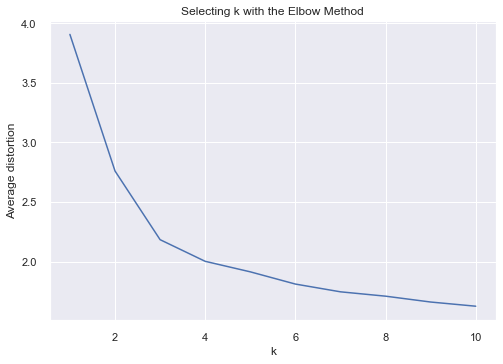

<IPython.core.display.Javascript object>

In [46]:
# defining a range for the number of clusters (k)
clusters = range(1, 11)

# creating an empty list to store the distortion values
meanDistortions = []

print("K-means with Manhattan Distance Measure :\n")
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(km_scaled_df)
    prediction = model.predict(km_scaled_df)
    distortion = (
        sum(np.min(cdist(km_scaled_df, model.cluster_centers_, "cityblock"), axis=1))
        / km_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters : ", k, "\tAverage Distortion : ", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- **The appropriate value of k from the elbow curve seems to be 2, 3 or 4.**

### Silhouette scores

Sihouette scores for clusters with Manhattan Distance Measure :

For n_clusters : 2, silhouette score is 0.41842496663230405
For n_clusters : 3, silhouette score is 0.5157182558882754
For n_clusters : 4, silhouette score is 0.355667061937737
For n_clusters : 5, silhouette score is 0.272689879182253
For n_clusters : 6, silhouette score is 0.25545029453735185
For n_clusters : 7, silhouette score is 0.24855525590161914
For n_clusters : 8, silhouette score is 0.22759494866370306
For n_clusters : 9, silhouette score is 0.21953058303607131
For n_clusters : 10, silhouette score is 0.22137407854796284


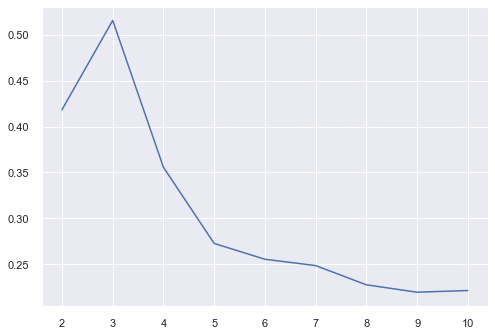

<IPython.core.display.Javascript object>

In [47]:
# creating an empty list to store the silhouette scores
sil_score_cb = []

cluster_list = list(range(2, 11))
print("Sihouette scores for clusters with Manhattan Distance Measure :\n")
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((km_scaled_df))
    # centers = clusterer.cluster_centers_
    score_cb = silhouette_score(km_scaled_df, preds)
    sil_score_cb.append(score_cb)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score_cb))

plt.plot(cluster_list, sil_score_cb)

- **From the silhouette score, it is seen that the highest silhouette score is 0.515718 for k=3**

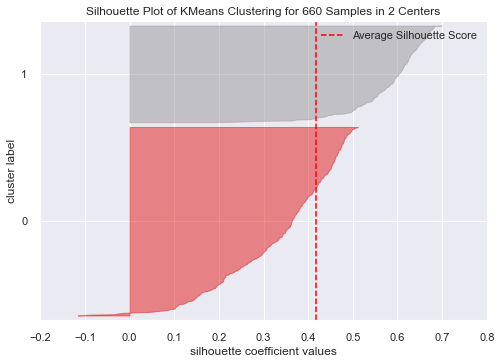

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [48]:
# Finding optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

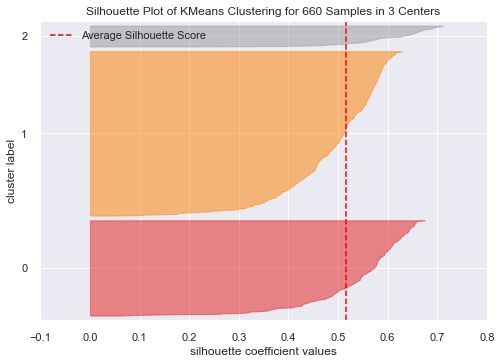

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [49]:
# Finding optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

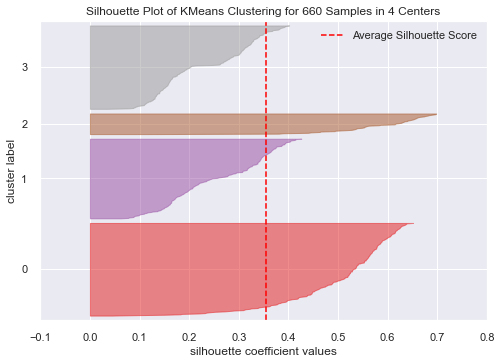

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [50]:
# Finding optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

- **For K-means with Manhattan distance measure, the appropriate value of k is 3 as the silhouette score is highest and also there is a knick at 3.**

### KMeans with Euclidean distance measure

K-means with Euclidean Distance Measure :

Number of Clusters :  1 	Average Distortion :  2.0069222262503614
Number of Clusters :  2 	Average Distortion :  1.4571553548514269
Number of Clusters :  3 	Average Distortion :  1.1466276549150365
Number of Clusters :  4 	Average Distortion :  1.0463825294774465
Number of Clusters :  5 	Average Distortion :  0.990772333470802
Number of Clusters :  6 	Average Distortion :  0.9430345572895963
Number of Clusters :  7 	Average Distortion :  0.9091362001500471
Number of Clusters :  8 	Average Distortion :  0.8893086141642894
Number of Clusters :  9 	Average Distortion :  0.8658488743027571
Number of Clusters :  10 	Average Distortion :  0.8415832873181416


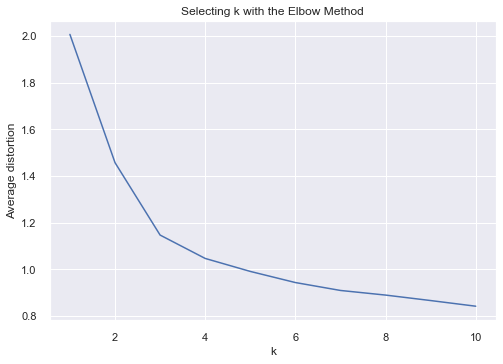

<IPython.core.display.Javascript object>

In [51]:
# defining a range for the number of clusters (k)
clusters = range(1, 11)

# creating an empty list to store the distortion values
meanDistortions = []

print("K-means with Euclidean Distance Measure :\n")
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(km_scaled_df)
    prediction = model.predict(km_scaled_df)
    distortion = (
        sum(np.min(cdist(km_scaled_df, model.cluster_centers_, "euclidean"), axis=1))
        / km_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters : ", k, "\tAverage Distortion : ", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- **The appropriate value of k from the elbow curve seems to be 2, 3 or 4.**

### Silhouette scores

For n_clusters : 2, silhouette score is 0.41842496663230405
For n_clusters : 3, silhouette score is 0.5157182558882754
For n_clusters : 4, silhouette score is 0.355667061937737
For n_clusters : 5, silhouette score is 0.2717470361094591
For n_clusters : 6, silhouette score is 0.25590676529850875
For n_clusters : 7, silhouette score is 0.23023650728289632
For n_clusters : 8, silhouette score is 0.22719898813309686
For n_clusters : 9, silhouette score is 0.2130847446830049
For n_clusters : 10, silhouette score is 0.21646030403018227


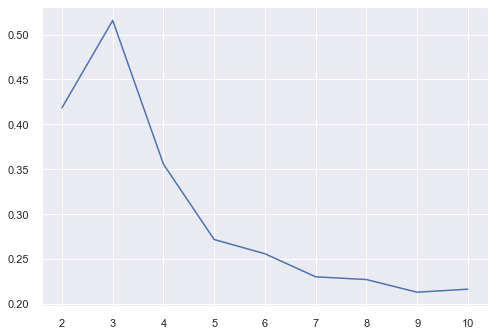

<IPython.core.display.Javascript object>

In [52]:
# creating an empty list to store the silhouette scores
sil_score_euc = []

cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((km_scaled_df))
    centers = clusterer.cluster_centers_
    score_euc = silhouette_score(km_scaled_df, preds)
    sil_score_euc.append(score_euc)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score_euc))

plt.plot(cluster_list, sil_score_euc)

- **From the silhouette score, it is seen that the highest silhouette score is 0.515718 for k=3**

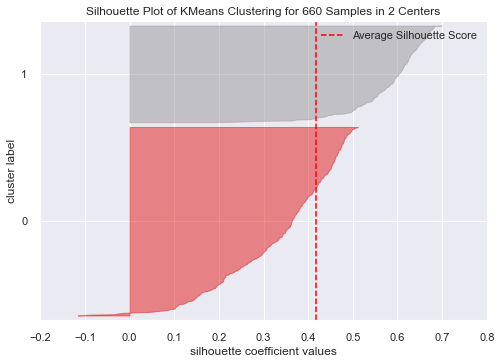

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [53]:
# Finding the optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

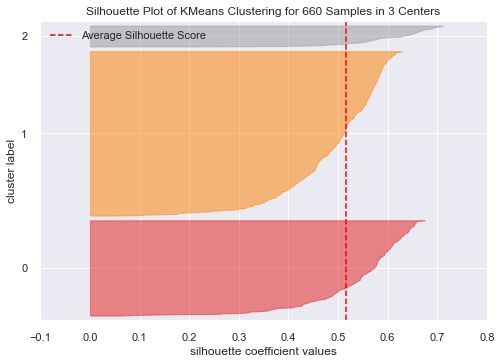

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [54]:
# Finding the optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

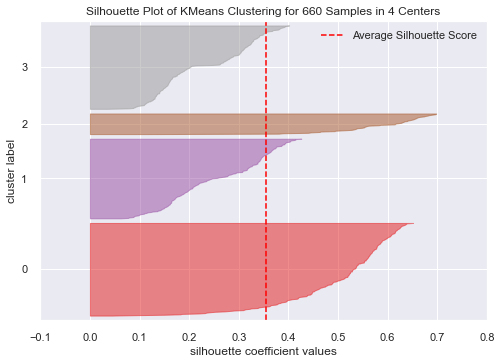

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [55]:
# Finding the optimal number of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(km_scaled_df)
visualizer.show()

- **For K-means with Euclidean distance measure, the appropriate value of k is 3 as the silhouette score is highest and also there is a knick at 3**

## Appropriate number of Clusters

- **It is seen that for k=3, which is the appropriate k value for both Manhattan and Euclidean distance measures, the silhouette scores are one and the same. Since the average distortion is low for Euclidean distance, I choose to continue with the Euclidean distance measure.**

In [56]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(km_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [57]:
# adding kmeans cluster labels to the original and scaled dataframes

data["KM_clusters"] = kmeans.labels_
km_data["KM_clusters"] = kmeans.labels_
km_scaled_df["KM_clusters"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [58]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters
Sl_No,,,,,,,
1,87073,100000,2,1,1,0,1
2,38414,50000,3,0,10,9,0
3,17341,50000,7,1,3,4,1
4,40496,30000,5,1,1,4,1
5,47437,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

In [59]:
km_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters
Sl_No,,,,,,
1,100000,2,1,1,0,1
2,50000,3,0,10,9,0
3,50000,7,1,3,4,1
4,30000,5,1,1,4,1
5,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

In [60]:
km_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


<IPython.core.display.Javascript object>

- KM_clusters feature is added to the dataset

## K-Means Cluster Profiling

In [61]:
cluster_profile_kmeans = km_data.groupby("KM_clusters").mean()

<IPython.core.display.Javascript object>

In [62]:
# Groupig the cluster by Total_Credit_Cards to build the cluster profile

cluster_profile_kmeans["count_in_each_segment"] = (
    km_data.groupby("KM_clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [63]:
# Displaying K-means cluster profile

cluster_profile_kmeans.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_clusters,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

- The above profiling is based on the mean values. Let's also check the median values and then compare the clusters

In [64]:
# checking the median values of the clusters

km_data.groupby("KM_clusters").median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KM_clusters,,,,,
0,12000,2,1,4,7
1,31000,6,3,1,2
2,145500,9,1,11,1


<IPython.core.display.Javascript object>

In [65]:
# Statistical summary of the clusters based on Avg_Credit_Limit

km_data.groupby("KM_clusters")["Avg_Credit_Limit"].describe()

,count,mean,std,min,25%,50%,75%,max
KM_clusters,,,,,,,,
0,224.0,12174.107143,5249.048524,3000.0,8000.0,12000.0,16000.0,50000.0
1,386.0,33782.383420,22169.460696,5000.0,13000.0,31000.0,52000.0,100000.0
2,50.0,141040.000000,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0


<IPython.core.display.Javascript object>

## Comparison of K-Means clusters

- The Avg_Credit_Limit for all three clusters is normally distributed as the mean and median are close to each other
- Most customers in clusters 0, 1 and 2 own 2, 6 and 9 credit cards respectively
- In general, customers in cluster 0 prefer calls, cluster 1 prefer bank visits and cluster 2 prefer online visits comparatively
- It can be considered that cluster 0 includes Standard, cluster 1 includes Medium and cluster 2 includes Premium customers based on the Avg_Credit_Limit

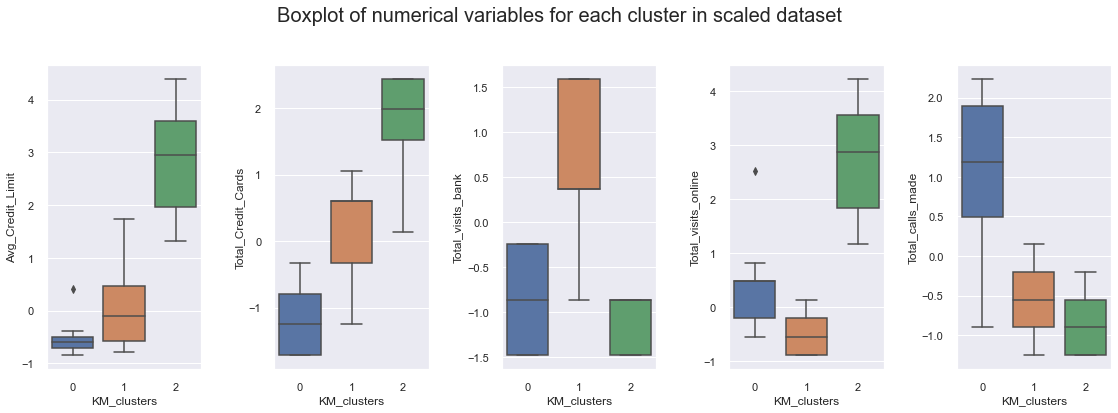

<IPython.core.display.Javascript object>

In [66]:
num_cols = km_scaled_df.columns
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster in scaled dataset", fontsize=20
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=km_scaled_df[num_cols[counter]], x=km_scaled_df["KM_clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

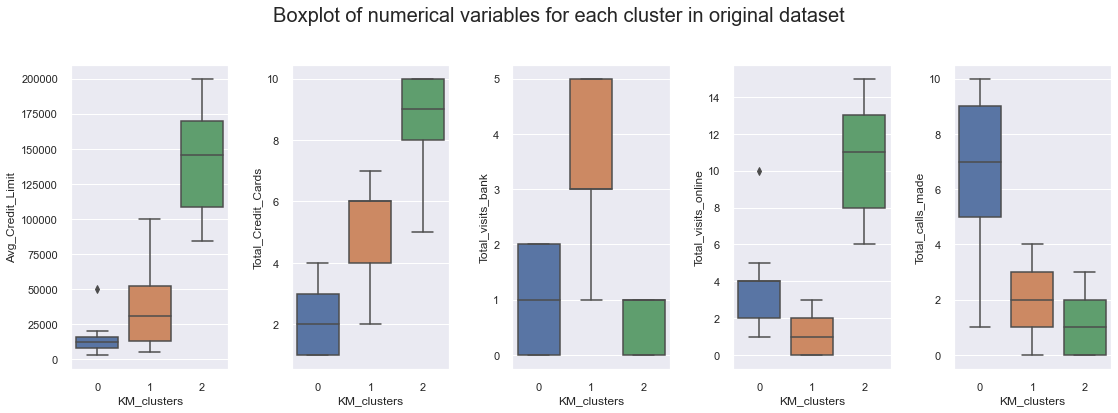

<IPython.core.display.Javascript object>

In [67]:
num_cols = km_data.columns
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster in original dataset", fontsize=20
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=km_data[num_cols[counter]], x=km_data["KM_clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights from K-Means Clusters

**Cluster 0**

- There are 224 observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via phone calls, followed by online visits
- The average number of total calls made by a customer yearly, is about 6-7 times
- The average credit limit is below $25K
- The average number of credit cards owned by a customer is 2/3

**Cluster 1**

- There are 386 of observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via bank visits, followed by phone calls
- The average number of total bank visits by a cutomer yearly, is about 3-4 times
- The average credit limit is anywhere between \\$5K and \\$100K
- The average number of credit cards owned by a customer is 5/6

**Cluster 2** 

- There are 50 observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via online, followed by phone calls
- The average number of total visits made online yearly, is about 10-11 times
- The average credit limit is above \\$84K
- This cluster has the highest maximum average credit limit of \\$200K
- The average number of credit cards owned by a customer is 8/9

# Hierarchical Clustering

In [68]:
# viewing the scaled data set to perform Hierarchical clustering

hc_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

### Identifying distance measure with the highest copehenetic correlation

In [69]:
# creating a list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# creating a list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage : {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage : 0.7391220243806552
Cophenetic correlation for Euclidean distance and complete linkage : 0.8599730607972423
Cophenetic correlation for Euclidean distance and average linkage : 0.8977080867389372
Cophenetic correlation for Euclidean distance and weighted linkage : 0.8861746814895477
Cophenetic correlation for Chebyshev distance and single linkage : 0.7382354769296767
Cophenetic correlation for Chebyshev distance and complete linkage : 0.8533474836336782
Cophenetic correlation for Chebyshev distance and average linkage : 0.8974159511838106
Cophenetic correlation for Chebyshev distance and weighted linkage : 0.8913624010768603
Cophenetic correlation for Mahalanobis distance and single linkage : 0.7058064784553605
Cophenetic correlation for Mahalanobis distance and complete linkage : 0.666353446387536
Cophenetic correlation for Mahalanobis distance and average linkage : 0.8326994115042136
Cophenetic correlation for Mahalanob

<IPython.core.display.Javascript object>

In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation

print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage


<IPython.core.display.Javascript object>

- Since Euclidean distance metric gives the highest cophenetic correlation, let's explore other linkage methods with Euclidean distance measure and check the scores.

### Exploring different linkage methods with Euclidean distance

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_scaled_df))
    print("Cophenetic correlation for {} linkage : {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage : 0.7391220243806552
Cophenetic correlation for complete linkage : 0.8599730607972423
Cophenetic correlation for average linkage : 0.8977080867389372
Cophenetic correlation for centroid linkage : 0.8939385846326323
Cophenetic correlation for ward linkage : 0.7415156284827493
Cophenetic correlation for weighted linkage : 0.8861746814895477


<IPython.core.display.Javascript object>

In [72]:
# printing the combination of distance metic and linkage method with the highest cophenet correlation

print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage


<IPython.core.display.Javascript object>

## Dendrograms for different linkage methods

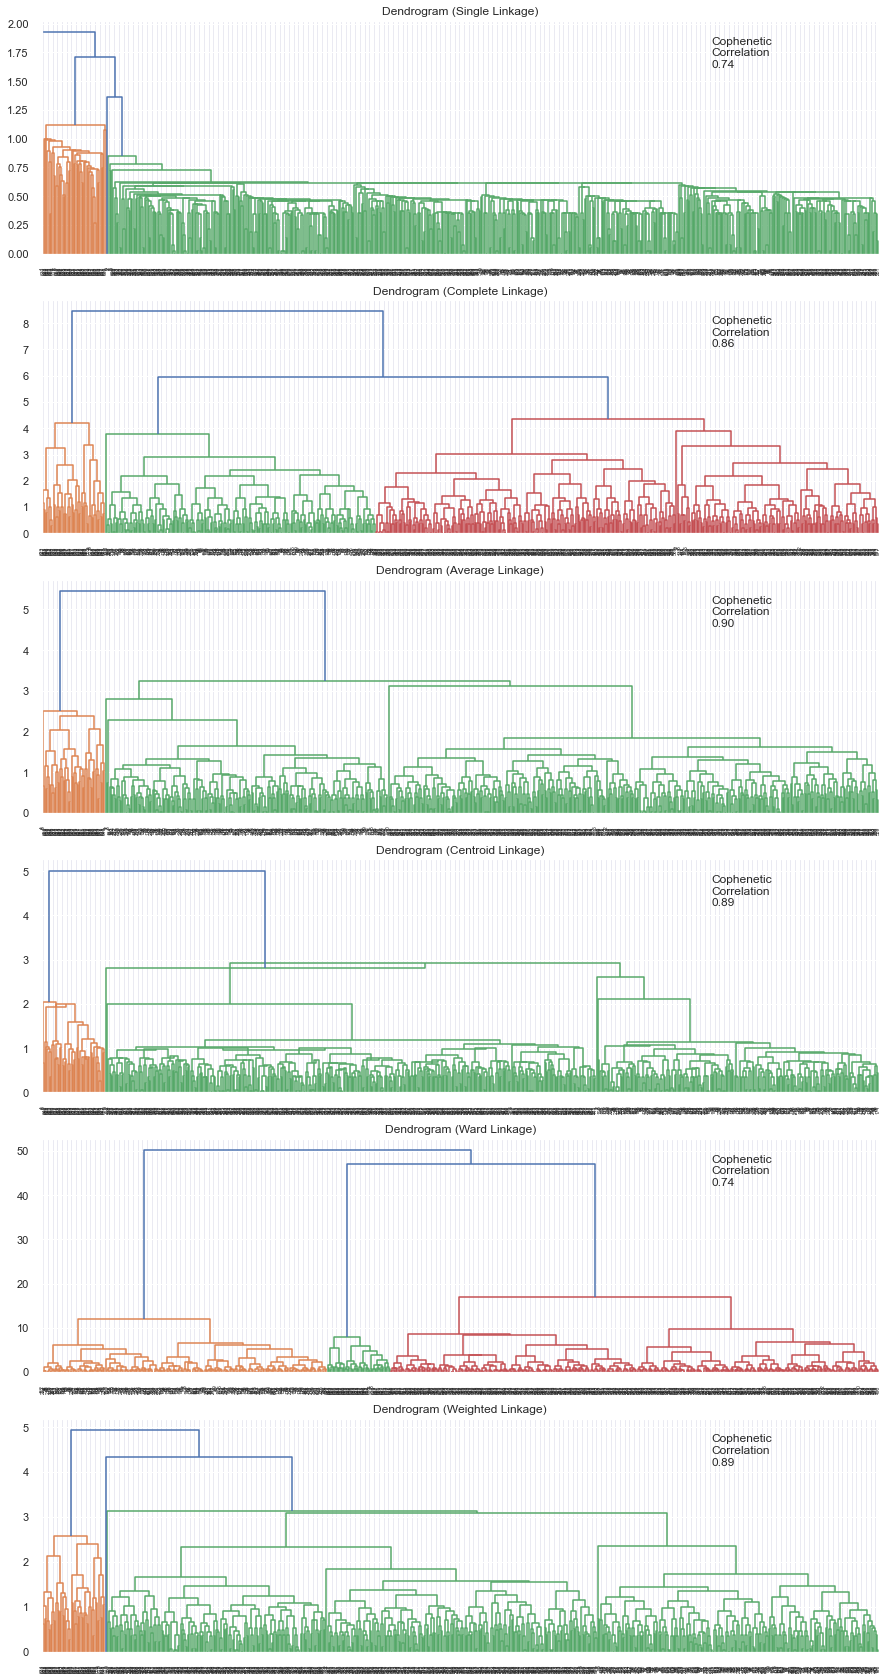

<IPython.core.display.Javascript object>

In [73]:
# adds background to the graph
sns.set(color_codes=True)

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# list to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

In [74]:
# creating a dataframe to compare cophenetic correlations for each linkage method

df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc.sort_values(by="Cophenetic Coefficient", ascending=False)

,Linkage,Cophenetic Coefficient
2,average,0.897708
3,centroid,0.893939
5,weighted,0.886175
1,complete,0.859973
4,ward,0.741516
0,single,0.739122


<IPython.core.display.Javascript object>

**Observations :**

From the above dendrograms it is seen that

- The average linkage method has the highest cophenetic correlation (0.90). But, the clusters are overlapping each other and are not distinct enough
- The average, centroid and the weighted linkage methods all have a cophenetic coefficient greater than 0.88, but the clusters are too imbalanced 
- The ward linkage has cophenetic correlation of 0.74 and also the clusters are more distinct and balanced comparatively

### Silhouette scores

Silhouette score for Euclidean distance with average linkage method :

For n_clusters : 2, silhouette score is 0.5703183487341072
For n_clusters : 3, silhouette score is 0.5159224326511334
For n_clusters : 4, silhouette score is 0.4749514359581223
For n_clusters : 5, silhouette score is 0.4403975302480271
For n_clusters : 6, silhouette score is 0.4153547954833329
For n_clusters : 7, silhouette score is 0.4183775674673902
For n_clusters : 8, silhouette score is 0.34306710358300163
For n_clusters : 9, silhouette score is 0.34154869328928283


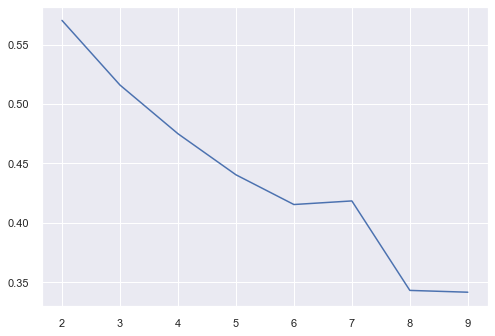

<IPython.core.display.Javascript object>

In [75]:
print("Silhouette score for Euclidean distance with average linkage method :\n")

sil_score = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    # clusterer = KMeans(n_clusters=n_clusters)
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="average"
    )
    preds = clusterer.fit_predict((hc_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(hc_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

Silhouette score for Euclidean distance with complete linkage method :

For n_clusters : 2, silhouette score is 0.5703183487341072
For n_clusters : 3, silhouette score is 0.5026435522440112
For n_clusters : 4, silhouette score is 0.3052705270883423
For n_clusters : 5, silhouette score is 0.2795859403684237
For n_clusters : 6, silhouette score is 0.2773808220551745
For n_clusters : 7, silhouette score is 0.2586336145039459
For n_clusters : 8, silhouette score is 0.25707737627902616
For n_clusters : 9, silhouette score is 0.16814918312851343


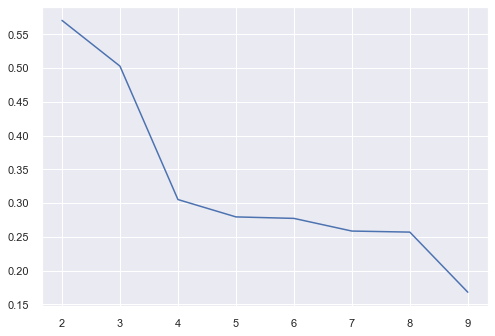

<IPython.core.display.Javascript object>

In [76]:
print("Silhouette score for Euclidean distance with complete linkage method :\n")

sil_score = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    # clusterer = KMeans(n_clusters=n_clusters)
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="complete"
    )
    preds = clusterer.fit_predict((hc_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(hc_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

Silhouette score for Euclidean distance with ward linkage method :

For n_clusters : 2, silhouette score is 0.41770414762109936
For n_clusters : 3, silhouette score is 0.5147639589979518
For n_clusters : 4, silhouette score is 0.348082258126694
For n_clusters : 5, silhouette score is 0.25691777326808435
For n_clusters : 6, silhouette score is 0.2267784972566746
For n_clusters : 7, silhouette score is 0.21629686854980873
For n_clusters : 8, silhouette score is 0.21869490619485493
For n_clusters : 9, silhouette score is 0.19527074669218447


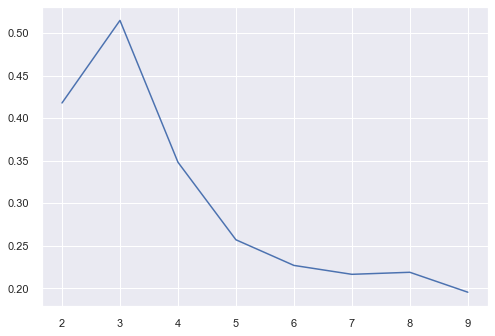

<IPython.core.display.Javascript object>

In [77]:
print("Silhouette score for Euclidean distance with ward linkage method :\n")

sil_score = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    # clusterer = KMeans(n_clusters=n_clusters)
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="ward"
    )
    preds = clusterer.fit_predict((hc_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(hc_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

Silhouette score for Euclidean distance with single linkage method :

For n_clusters : 2, silhouette score is 0.2739862994346946
For n_clusters : 3, silhouette score is 0.37428930914250813
For n_clusters : 4, silhouette score is 0.21203755185638862
For n_clusters : 5, silhouette score is 0.18361418805028704
For n_clusters : 6, silhouette score is 0.17981743549362553
For n_clusters : 7, silhouette score is 0.1761045737557418
For n_clusters : 8, silhouette score is 0.16241098554020336
For n_clusters : 9, silhouette score is 0.15462677733917365


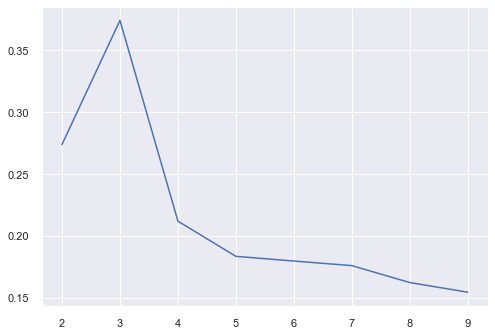

<IPython.core.display.Javascript object>

In [78]:
print("Silhouette score for Euclidean distance with single linkage method :\n")

sil_score = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    # clusterer = KMeans(n_clusters=n_clusters)
    clusterer = AgglomerativeClustering(
        n_clusters=n_clusters, affinity="euclidean", linkage="single"
    )
    preds = clusterer.fit_predict((hc_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(hc_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters : {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observations :**

- From the above analysis it is seen that the silhouette score for ward linkage method for k=3 is the highest (0.51476) amongst all linkage methods, for different values of k

## Appropriate number of Clusters

- **Taking ward linkage with k=3 as the appropriate linkage method with Euclidean distance measure as it has a cophenetic correlation of 0.74 where the clusters are distinct, well separated and pretty balanced comparatively. Also the silhouette score for k=3 is the highest when compared with the rest**

In [79]:
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
hclust.fit(hc_scaled_df)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [80]:
# adding hc cluster labels to the original and scaled dataframes

data["HC_clusters"] = hclust.labels_
hc_data["HC_clusters"] = hclust.labels_
hc_scaled_df["HC_clusters"] = hclust.labels_

<IPython.core.display.Javascript object>

In [81]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
1,87073,100000,2,1,1,0,1,0
2,38414,50000,3,0,10,9,0,1
3,17341,50000,7,1,3,4,1,0
4,40496,30000,5,1,1,4,1,0
5,47437,100000,6,0,12,3,2,2


<IPython.core.display.Javascript object>

In [82]:
hc_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_clusters
Sl_No,,,,,,
1,100000,2,1,1,0,0
2,50000,3,0,10,9,1
3,50000,7,1,3,4,0
4,30000,5,1,1,4,0
5,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

In [83]:
hc_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_clusters
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


<IPython.core.display.Javascript object>

- HC_clusters label is added to the dataset

## Hierarchical Cluster Profiling

In [84]:
cluster_profile_hclust = hc_data.groupby("HC_clusters").mean()

<IPython.core.display.Javascript object>

In [85]:
# Groupig the cluster by Total_Credit_Cards to build the cluster profile

cluster_profile_hclust["count_in_each_segment"] = (
    hc_data.groupby("HC_clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [86]:
# Displaying Hierarchical cluster profile

cluster_profile_hclust.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_clusters,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

- The above profiling is based on the mean values. Let's also check the median values and then compare the clusters

In [87]:
# checking the median values of the clusters

hc_data.groupby("HC_clusters").median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_clusters,,,,,
0,31000,6,3,1,2
1,12000,2,1,4,7
2,145500,9,1,11,1


<IPython.core.display.Javascript object>

In [88]:
# Statistical summary of the clusters based on Avg_Credit_Limit

hc_data.groupby("HC_clusters")["Avg_Credit_Limit"].describe()

,count,mean,std,min,25%,50%,75%,max
HC_clusters,,,,,,,,
0,385.0,33851.948052,22156.084628,5000.0,13000.0,31000.0,52000.0,100000.0
1,225.0,12151.111111,5248.665741,3000.0,8000.0,12000.0,16000.0,50000.0
2,50.0,141040.000000,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0


<IPython.core.display.Javascript object>

## Comparison of Hierarchical clusters

- The Avg_Credit_Limit for all three clusters is normally distributed as the mean and median are close to each other
- Most customers in clusters 0, 1 and 2 own 6, 2 and 9 credit cards respectively
- In general, customers in cluster 0 prefer bank visits, cluster 1 prefer calls and cluster 2 prefer online visits comparatively
- It can be considered that cluster 0 includes Medium, cluster 1 includes Standard and cluster 2 includes Premium customers based on the Avg_Credit_Limit

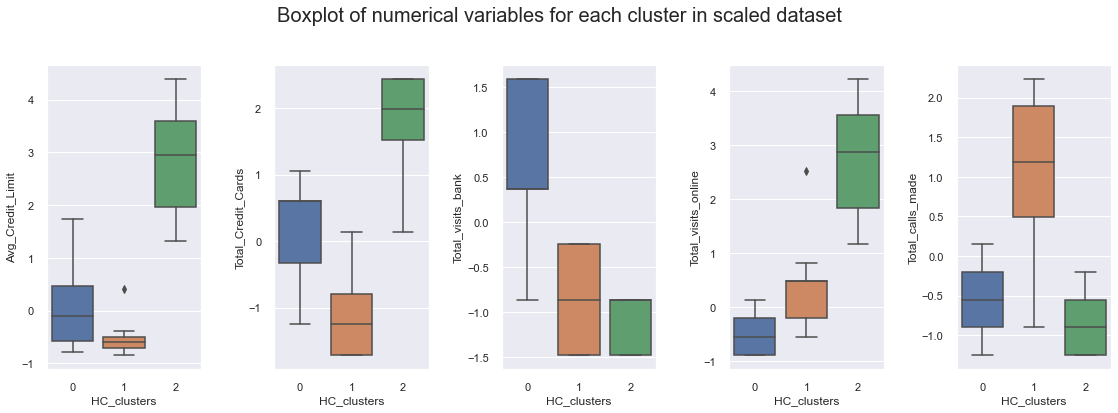

<IPython.core.display.Javascript object>

In [89]:
num_cols = hc_scaled_df.columns
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster in scaled dataset", fontsize=20
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=hc_scaled_df[num_cols[counter]], x=hc_scaled_df["HC_clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

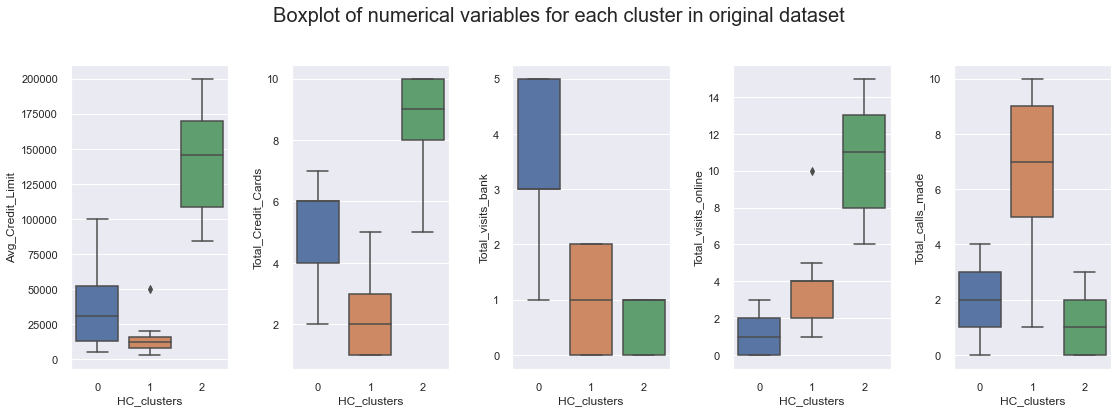

<IPython.core.display.Javascript object>

In [90]:
num_cols = hc_data.columns
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster in original dataset", fontsize=20
)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=hc_data[num_cols[counter]], x=hc_data["HC_clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights from Hierarchical clustering

**Cluster 0**

- There are 385 observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via bank visits, followed by phone calls
- The average number of total bank visits made by a customer yearly, is about 3-4 times
- The average credit limit is anywhere between \\$5K to \\$100K
- The average number of credit cards owned by a customer is 5/6

**Cluster 1**

- There are 225 of observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via calls, followed by online visits
- The average number of total calls by a cutomer yearly, is about 6-7 times
- The average credit limit is below \\$25K
- The average number of credit cards owned by a customer is 2/3

**Cluster 2** 

- There are 50 observations in this cluster
- Highly preferred mode of contact by customers in this cluster is via online, followed by phone calls
- The average number of total visits made online yearly, is about 10-11 times
- The average credit limit is above \\$84K
- This cluster has the highest maximum average credit limit of \\$200K
- The average number of credit cards owned by a customer is 8/9

# Comparison of K-Means and Hierarchical clusters

### Similarities

- The appropriate number of clusters for both algorithms is 3
- Cluster 2 for K-means and Hierarchical clusters are exactly the same w.r.t. the mean values for different features
- Average credit limit, total credit cards and total online visits are all highest in cluster 2 for both algorithms
- Cluster 2 in both algorithms have 50 observations each
- Silhouette score for K-means (0.51572) and that of Hierarchical clustering (0.51476) are approximately the same 
- Cluster 2 has Premium customers (the highest average credit limit is between \\$84K and \\$200K)
- Clustering is done on the mode of contact preferred by the customer


### Differences

- The number of observations in clusters 0 and 1 are : 
    - 224, 386 for K-means and 385, 225 for Hierarchical clustering
- Hierarchical clustering 
    - took more time for execution
    - resulted in overlapping clusters
    - complex to interpret
    - difficult to identify the appropriate number of clusters comparatively

### Checking the clusters for the records with duplicate Customer Key 

In [91]:
data.loc[(data["Customer Key"] == 47437)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
5,47437,100000,6,0,12,3,2,2
333,47437,17000,7,3,1,0,1,0


<IPython.core.display.Javascript object>

In [92]:
data.loc[(data["Customer Key"] == 96929)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
392,96929,13000,4,5,0,0,1,0
399,96929,67000,6,2,2,2,1,0


<IPython.core.display.Javascript object>

In [93]:
data.loc[(data["Customer Key"] == 37252)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
49,37252,6000,4,0,2,8,0,1
433,37252,59000,6,2,1,2,1,0


<IPython.core.display.Javascript object>

In [94]:
data.loc[(data["Customer Key"] == 50706)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
412,50706,44000,4,5,0,2,1,0
542,50706,60000,7,5,2,2,1,0


<IPython.core.display.Javascript object>

In [95]:
data.loc[(data["Customer Key"] == 97935)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_clusters,HC_clusters
Sl_No,,,,,,,,
105,97935,17000,2,1,2,10,0,1
633,97935,187000,7,1,7,0,2,2


<IPython.core.display.Javascript object>

- Among the sets of duplicate Customer Key records, it can be seen that in three out five cases the customers have moved from one cluster to the other
- By tracking the shifting of customers between clusters, we can adapt to different mode of contacts w.r.t to the new cluster

# Business Insights and Recommendations

- Bank should provide:
    - Digital support like live chat/chat bot to customers who prefer online visits
    - Automated Phone Teller services to address the customer needs and eventually reduce the call wait time
    - Personalised services such as Success Managers (CSM) to customers who visit the bank in person
- Marketing team should send offers via online, text and mail depending upon cutomer preferences
- Operations Team should conduct online and phone surveys to customers based on their preference, to get feedback on the customer services provided and focus on ways to improve 
- The bank should keep track of the changes in the cluster pattern of a customer and target them based on their current preferences
- The bank must target customers with average credit limit below 12K to upsell their credit card services as they are the customers who own a minimum number of credit cards
- The bank should offer to increase the credit limit of customers with their average credit limit below 12K because they are large in number